In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/user/Desktop/Guwahati_weather.csv')

In [3]:
df

,Unnamed: 0,date,temp_min,temp_max,humidity,pressure,wind_speed,precipitation,day_of_year,month,day,Station
0,0,2015-01-01,13.9,25.8,69,1009.9,9.2,0.0,1,1,1,"Railway Colony, Guwahati - APCB_6941"
1,1,2015-01-02,16.6,26.3,69,1010.3,7.0,0.0,2,1,2,"Railway Colony, Guwahati - APCB_6941"
2,2,2015-01-03,18.0,24.5,72,1010.2,7.1,2.7,3,1,3,"Railway Colony, Guwahati - APCB_6941"
3,3,2015-01-04,17.2,22.8,85,1007.0,11.5,1.7,4,1,4,"Railway Colony, Guwahati - APCB_6941"
4,4,2015-01-05,14.9,22.1,78,1005.8,20.2,0.9,5,1,5,"Railway Colony, Guwahati - APCB_6941"
...,...,...,...,...,...,...,...,...,...,...,...,...
21913,21913,2024-12-27,13.3,24.4,77,1012.7,11.2,0.0,362,12,27,"LGBI Airport, Guwahati - PCBA_3409390"
21914,21914,2024-12-28,12.8,25.1,75,1011.2,11.3,0.0,363,12,28,"LGBI Airport, Guwahati - PCBA_3409390"
21915,21915,2024-12-29,13.4,23.8,80,1009.6,6.9,0.0,364,12,29,"LGBI Airport, Guwahati - PCBA_3409390"
21916,21916,2024-12-30,14.3,24.4,78,1010.7,8.6,0.0,365,12,30,"LGBI Airport, Guwahati - PCBA_3409390"


In [4]:
def preprocess_data(df, lag=7):
    """Prepare weather data for modeling"""
    # Ensure the 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract additional date-related features
    df['day_of_year'] = df['date'].dt.dayofyear
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    # Create seasonal features
    df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
    
    # Create lag features (previous days' weather)
    for i in range(1, 7):
        df[f'temp_min_lag_{i}'] = df['temp_min'].shift(i)
        df[f'temp_max_lag_{i}'] = df['temp_max'].shift(i)
        df[f'humidity_lag_{i}'] = df['humidity'].shift(i)
        df[f'precipitation_lag_{i}'] = df['precipitation'].shift(i)
    
    # Drop rows with NaN values (created by lag features)
    df = df.dropna()
    
    return df

In [5]:
df_t = preprocess_data(df)

In [6]:
df_t.head()

,Unnamed: 0,date,temp_min,temp_max,humidity,pressure,wind_speed,precipitation,day_of_year,month,...,humidity_lag_4,precipitation_lag_4,temp_min_lag_5,temp_max_lag_5,humidity_lag_5,precipitation_lag_5,temp_min_lag_6,temp_max_lag_6,humidity_lag_6,precipitation_lag_6
6,6,2015-01-07,14.3,23.0,77,1007.4,8.0,0.1,7,1,...,72.0,2.7,16.6,26.3,69.0,0.0,13.9,25.8,69.0,0.0
7,7,2015-01-08,14.3,23.8,79,1007.9,12.0,1.1,8,1,...,85.0,1.7,18.0,24.5,72.0,2.7,16.6,26.3,69.0,0.0
8,8,2015-01-09,12.0,22.7,81,1007.8,12.7,0.0,9,1,...,78.0,0.9,17.2,22.8,85.0,1.7,18.0,24.5,72.0,2.7
9,9,2015-01-10,12.7,22.5,72,1009.4,8.8,0.0,10,1,...,79.0,0.0,14.9,22.1,78.0,0.9,17.2,22.8,85.0,1.7
10,10,2015-01-11,12.1,22.1,79,1011.4,8.2,0.0,11,1,...,77.0,0.1,14.2,22.1,79.0,0.0,14.9,22.1,78.0,0.9


In [7]:
len(df_t)

21912

In [8]:
df_t.columns

Index(['Unnamed: 0', 'date', 'temp_min', 'temp_max', 'humidity', 'pressure',
       'wind_speed', 'precipitation', 'day_of_year', 'month', 'day', 'Station',
       'day_of_year_sin', 'day_of_year_cos', 'temp_min_lag_1',
       'temp_max_lag_1', 'humidity_lag_1', 'precipitation_lag_1',
       'temp_min_lag_2', 'temp_max_lag_2', 'humidity_lag_2',
       'precipitation_lag_2', 'temp_min_lag_3', 'temp_max_lag_3',
       'humidity_lag_3', 'precipitation_lag_3', 'temp_min_lag_4',
       'temp_max_lag_4', 'humidity_lag_4', 'precipitation_lag_4',
       'temp_min_lag_5', 'temp_max_lag_5', 'humidity_lag_5',
       'precipitation_lag_5', 'temp_min_lag_6', 'temp_max_lag_6',
       'humidity_lag_6', 'precipitation_lag_6'],
      dtype='object')

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.keras import TqdmCallback  # tqdm integration
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Optional: Drop unwanted columns
df_model = df_t.drop(columns=['Unnamed: 0', 'date', 'day_of_year', 'month', 'day', 'Station'])

# Targets: what we want to predict
targets = ['temp_min', 'temp_max', 'humidity', 'precipitation']

# Features: all other columns
features = [col for col in df_model.columns if col not in targets]

X = df_model[features].values
y = df_model[targets].values

# --- Scaling ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# --- Reshape to LSTM format: [samples, time steps = 1, features] ---
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# --- Model ---
model = Sequential([
    # First LSTM layer, returns sequences so the second LSTM can process them
    LSTM(192, return_sequences=True, 
         input_shape=(1, X_train.shape[2]), 
         activation='tanh'),
    
    # Second LSTM layer
    LSTM(128, activation='tanh'),
    
    # Dropout layer to reduce overfitting
    Dropout(0.3),
    
    # Fully connected layer
    Dense(64, activation='relu'),
    
    # Final output layer for your 4 targets
    Dense(4)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# --- Train with tqdm progress bar ---
model.fit(
    X_train,
    y_train,
    epochs=125,
    batch_size=32,
    validation_split=0.2,
    callbacks=[TqdmCallback(verbose=1)]
)

# --- Evaluate ---
loss = model.evaluate(X_test, y_test)
print("Test MSE Loss:", loss)

# --- Predict and inverse scale ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


/Users/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 192)         │       169,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,596 (1.31 MB)

 Trainable params: 342,596 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4093 - val_loss: 0.2508
Epoch 2/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2690 - val_loss: 0.2431
Epoch 3/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2559 - val_loss: 0.2365
Epoch 4/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2611 - val_loss: 0.2469
Epoch 5/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2486 - val_loss: 0.2328
Epoch 6/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2388 - val_loss: 0.2328
Epoch 7/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2402 - val_loss: 0.2259
Epoch 8/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2409 - val_loss: 0.2267
Epoch 9/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2294 - val_loss: 0.2281
Epoch 10/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2269 - val_loss: 0.2155
Epoch 11/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2209 - val_loss: 0.2143
Epoch 12/125
439/439 ━━━━━━━━━━━━━━━━━━━━

439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0718 - val_loss: 0.0984
Epoch 69/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0720 - val_loss: 0.0967
Epoch 70/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0726 - val_loss: 0.1000
Epoch 71/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0714 - val_loss: 0.1017
Epoch 72/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0693 - val_loss: 0.0961
Epoch 73/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0670 - val_loss: 0.0970
Epoch 74/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0662 - val_loss: 0.1045
Epoch 75/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0681 - val_loss: 0.0957
Epoch 76/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0687 - val_loss: 0.0927
Epoch 77/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0647 - val_loss: 0.0942
Epoch 78/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0638 - val_loss: 0.0936
Epoch 79/125
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 

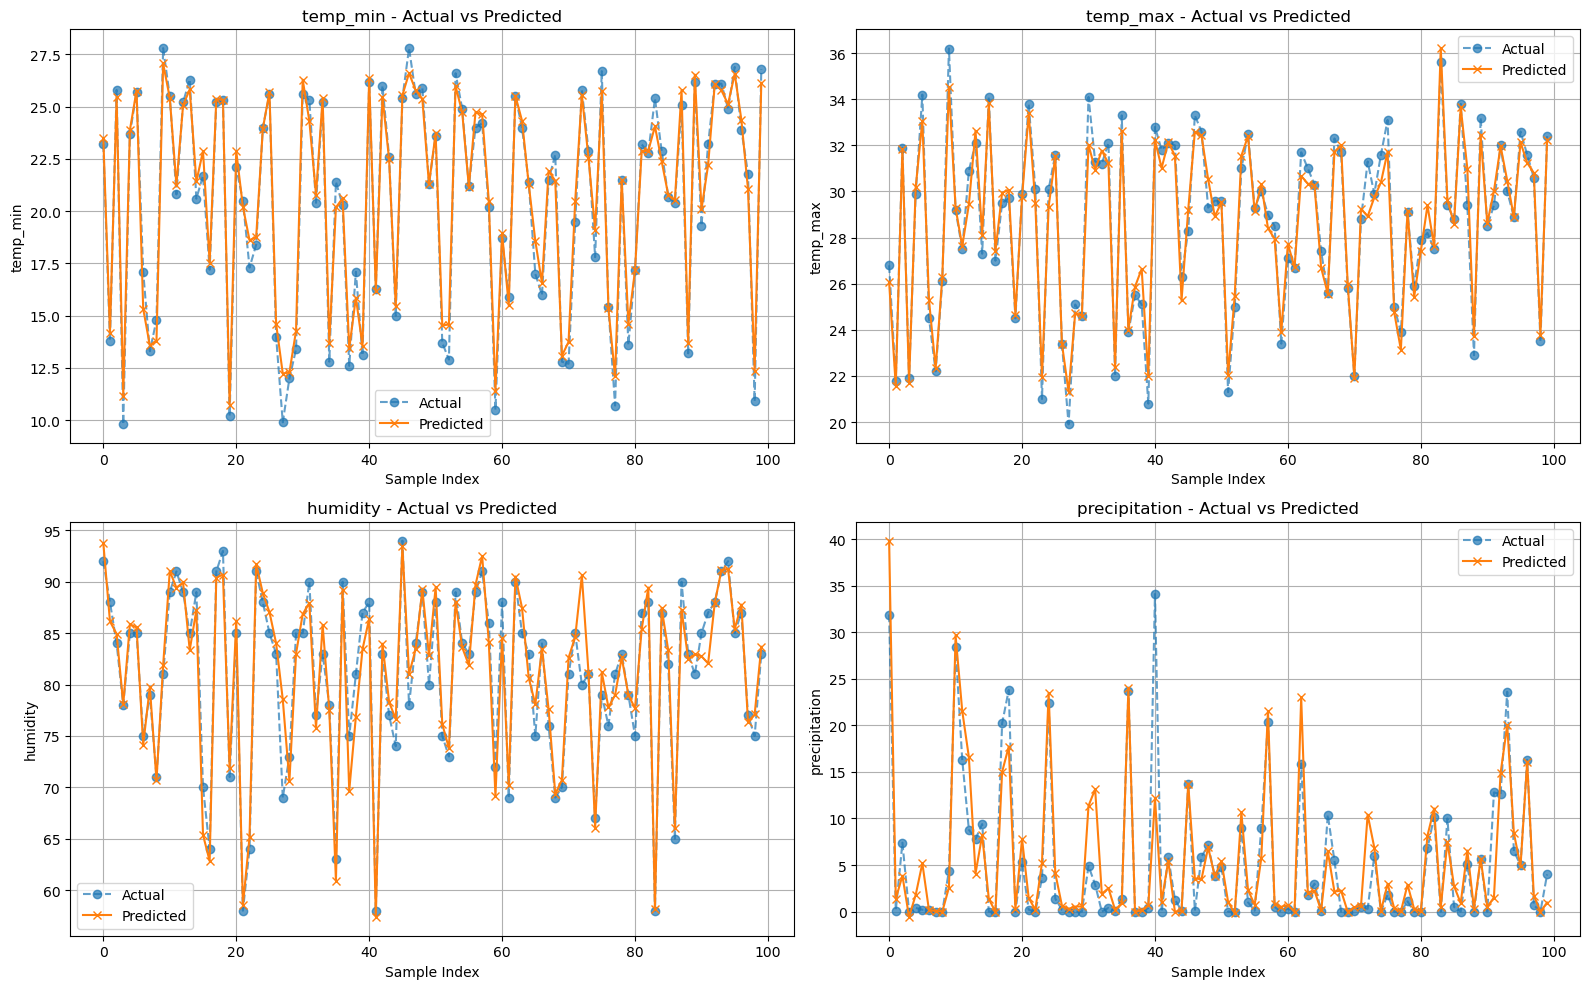

In [10]:
import matplotlib.pyplot as plt

# --- Get true values from test set (inverse scaled) ---
y_test_inv = scaler_y.inverse_transform(y_test)

# --- Plot predictions vs actuals for each target ---
target_names = ['temp_min', 'temp_max', 'humidity', 'precipitation']

plt.figure(figsize=(16, 10))

for i, target in enumerate(target_names):
    plt.subplot(2, 2, i+1)
    plt.plot(y_test_inv[:100, i], label='Actual', marker='o', linestyle='--', alpha=0.7)
    plt.plot(y_pred[:100, i], label='Predicted', marker='x')
    plt.title(f'{target} - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'temp_min_actual': y_test_inv[:, 0],
    'temp_min_predicted': y_pred[:, 0],
    'temp_max_actual': y_test_inv[:, 1],
    'temp_max_predicted': y_pred[:, 1],
    'humidity_actual': y_test_inv[:, 2],
    'humidity_predicted': y_pred[:, 2],
    'precipitation_actual': y_test_inv[:, 3],
    'precipitation_predicted': y_pred[:, 3],
})

comparison_df_rounded = comparison_df.round(2)

# Show top 10 rows
print(comparison_df_rounded.head(10))


   temp_min_actual  temp_min_predicted  temp_max_actual  temp_max_predicted  \
0             23.2           23.500000             26.8           26.090000   
1             13.8           14.180000             21.8           21.559999   
2             25.8           25.450001             31.9           31.840000   
3              9.8           11.160000             21.9           21.709999   
4             23.7           23.879999             29.9           30.180000   
5             25.7           25.770000             34.2           33.070000   
6             17.1           15.330000             24.5           25.290001   
7             13.3           13.580000             22.2           22.330000   
8             14.8           13.800000             26.1           26.270000   
9             27.8           27.070000             36.2           34.540001   

   humidity_actual  humidity_predicted  precipitation_actual  \
0             92.0           93.769997                  31.9   
1 

In [12]:
from sklearn.metrics import mean_absolute_error

# Target names
target_names = ['temp_min', 'temp_max', 'humidity']

# Compute and print MAE per target
for i, target in enumerate(target_names):
    mse = mean_absolute_error(y_test_inv[:, i], y_pred[:, i])
    print(f"Test MAE for {target}: {mse:.4f}")


Test MAE for temp_min: 0.5373
Test MAE for temp_max: 0.5859
Test MAE for humidity: 1.6931


In [13]:
from sklearn.metrics import mean_absolute_percentage_error

# Compute and print MAPE per target
for i, target in enumerate(target_names):
    mape = mean_absolute_percentage_error(y_test_inv[:, i], y_pred[:, i]) * 100  
    print(f"Test MAPE for {target}: {mape:.2f}%")


Test MAPE for temp_min: 2.97%
Test MAPE for temp_max: 2.07%
Test MAPE for humidity: 2.19%


In [14]:
import pickle

# --- Save the model ---
#model.save("/Users/user/Desktop/iot_project/models/weather_lstm_model.keras")  # 

